# Régression logistique

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from rasterio.plot import show
from shapely import *
from shapely.wkt import *

In [22]:
# Lecture des fichiers CSV
gdf_csv_path = 'processed_data/swiss_data_all_with_temp_region.csv'
df_presence_csv_path = 'processed_data/df_berce_clean.csv'

# Lecture du GeoDataFrame gdf à partir du CSV
gdf = pd.read_csv(gdf_csv_path)
# Supposons que la géométrie est stockée dans une colonne appelée 'geometry' au format WKT
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
gdf.set_crs(epsg=2056, inplace=True)

# Lecture du DataFrame df_presence à partir du CSV
df_presence = pd.read_csv(df_presence_csv_path)

df_presence.describe()

# Supposons que les coordonnées géographiques sont stockées dans les colonnes 'latitude' et 'longitude'
geometry = [Point(xy) for xy in zip(df_presence['decimalLongitude'], df_presence['decimalLatitude'])]
gdf_presence = gpd.GeoDataFrame(df_presence, geometry=geometry, crs="EPSG:4326")

# Étape 2 : Conversion des coordonnées géographiques en LV95
gdf_presence = gdf_presence.to_crs(epsg=2056)

# Étape 3 : Création de la colonne "Presence" dans gdf et initialisation à 0
gdf['Presence'] = 0
gdf['Count'] = 0

# Étape 4 : Comptage des points présents dans chaque zone et incrémentation de la colonne "Presence"
for i, zone in gdf.iterrows(): # TODO : Make it as a func and aply it to gdf !
    # Compter les points de gdf_presence qui sont dans la zone actuelle
    points_in_zone = gdf_presence[gdf_presence.geometry.within(zone.geometry)]
    # Incrémenter la colonne 'Presence' par le nombre de points trouvés
    if len(points_in_zone) > 0 :
        gdf.at[i, 'Presence'] = 1
        gdf.at[i, 'Count'] += len(points_in_zone)

In [23]:
print(gdf[gdf['Count'] != 0])

         idx                                           geometry   altitude  \
28       720  POLYGON ((2488071.58 1116261.72, 2489071.58 11...   422.1032   
29       721  POLYGON ((2488071.58 1117261.72, 2489071.58 11...   413.3760   
36       944  POLYGON ((2489071.58 1114261.72, 2490071.58 11...   378.2908   
38       946  POLYGON ((2489071.58 1116261.72, 2490071.58 11...   401.6440   
39       947  POLYGON ((2489071.58 1117261.72, 2490071.58 11...   434.0456   
...      ...                                                ...        ...   
42309  77609  POLYGON ((2828071.58 1165261.72, 2829071.58 11...  1392.2960   
42337  77648  POLYGON ((2828071.58 1204261.72, 2829071.58 12...  1574.5788   
42381  78063  POLYGON ((2830071.58 1167261.72, 2831071.58 11...  1293.2292   
42393  78093  POLYGON ((2830071.58 1197261.72, 2831071.58 11...  1239.3408   
42411  78290  POLYGON ((2831071.58 1168261.72, 2832071.58 11...  1380.9916   

       TypoCH_NUM                                           Bod

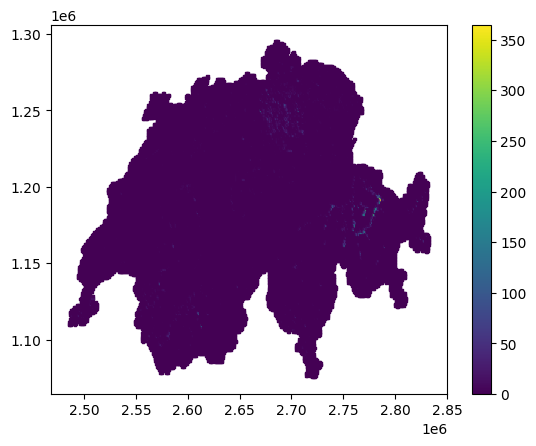

In [24]:
gdf['x'] = None
gdf['y'] = None

for idx, row in gdf.iterrows():
    polygon = row['geometry']
    x, y = polygon.exterior.xy
    gdf.at[idx, 'x'] = x[0]
    gdf.at[idx, 'y'] = y[0]

gdf.crs = 'EPSG:2056'

plt.scatter(gdf['x'], gdf['y'], c=gdf['Count'], cmap='viridis', marker='s', s=2.4)
plt.colorbar()
plt.show()